## 利用sklearn库中的LogisticRegression模型对MNIST数据集进行识别（分类）

### MNIST数据集（0~9共10个数字的手写体）介绍
#### MNIST数据集获取地址：http://yann.lecun.com/exdb/mnist （一共4个文件，训练集、训练集标签、测试集、测试集标签）
#### MNIST数据集中的训练集共有60000 张图像和对应的标签，测试集有10000 张图像和对应的标签。每张图片是一个28×28像素的手写数字灰度图（图像像素值在0 ~ 255之间，像素值越大，表现为该点越白）。

#### LogisticRegression模型文档：
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#### LogisticRegression模型参数详解：
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [5]:
# 导包
import struct,os
import numpy as np
import matplotlib.pyplot as plt
from array import array as pyarray
from numpy import append,array,int8,uint8,zeros
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### 加载MNIST数据集（将下载好的文件包解压到指定目录下）

In [9]:
# 自定义加载函数load_mnist
def load_mnist(image_file,label_file,path=r""):
    digits=np.arange(10)

    fname_image = os.path.join(path,image_file)
    fname_label = os.path.join(path, label_file)

    flbl = open(fname_label,'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b",flbl.read())
    flbl.close()

    fimg = open(fname_image,'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B",fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows*cols),dtype = uint8)
    labels = zeros((N,1), dtype = int8)
    for i in range(len(ind)):
        images[i] = array(img[ind[i]*rows*cols : (ind[i]+1)*rows*cols]).reshape((1,rows*cols))
        labels[i] = lbl[ind[i]]
    return images,labels

In [10]:
# 加载数据
train_image, train_label = load_mnist('train-images.idx3-ubyte', 'train-labels.idx1-ubyte')
test_image, test_label = load_mnist('t10k-images.idx3-ubyte','t10k-labels.idx1-ubyte')

In [11]:
# 自定义图像展示函数show_image
def show_image(imgdata, imgtarget, show_column, show_row, titlename):
    # show_column * show_row = len(imgdata)
    for index, (im, it) in enumerate(list(zip(imgdata, imgtarget))):
        xx = im.reshape(28,28)
        plt.subplots_adjust(left=1, bottom=None, right=3,top=4, wspace=None, hspace=None)
        plt.subplot(show_row,show_column,index+1)
        plt.axis('off')
        plt.imshow(xx, cmap='gray', interpolation='nearest')
        plt.title(titlename+':%i' % it)

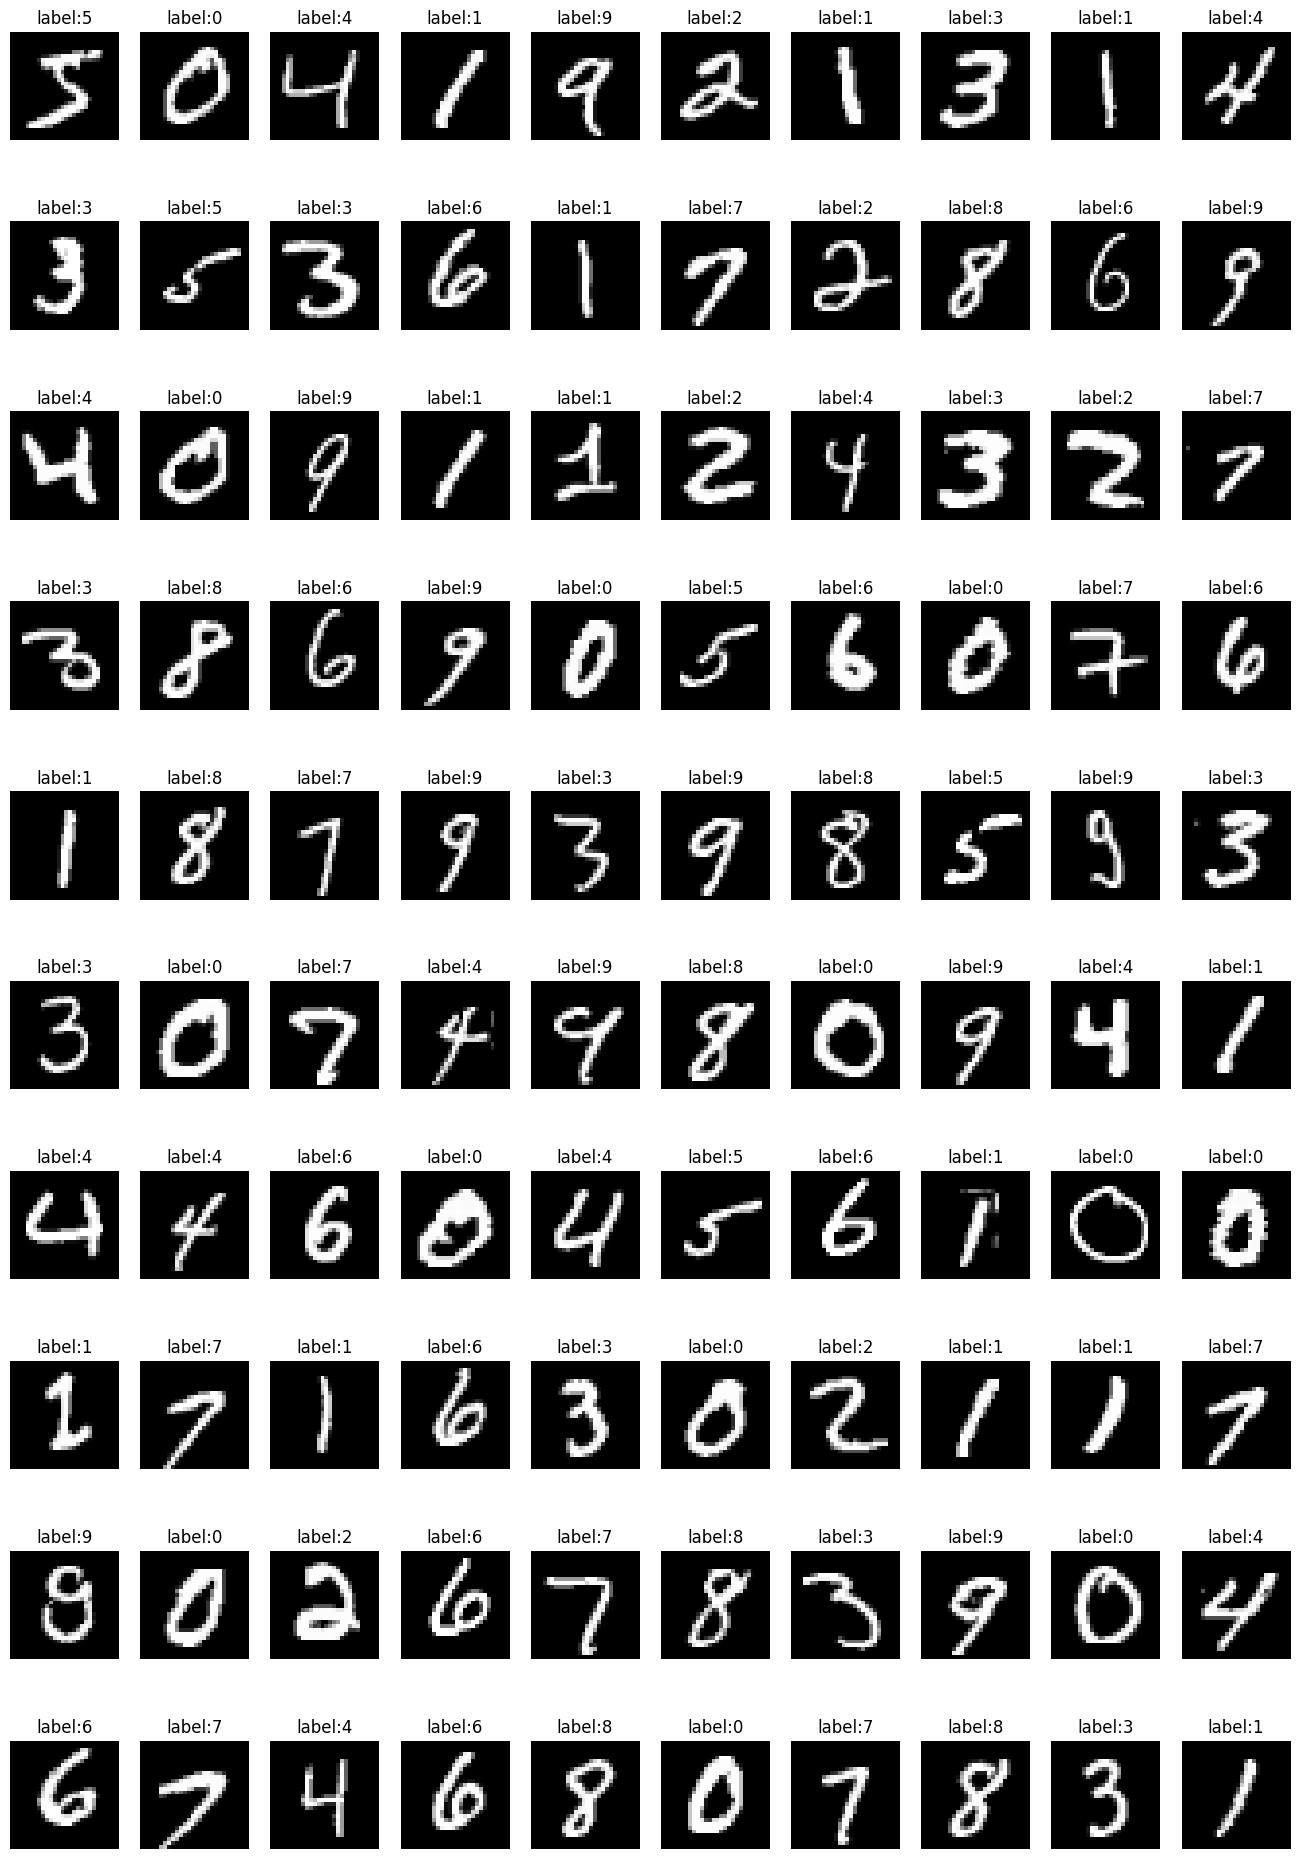

In [12]:
# 展示训练集的前100张数字图像
show_image(train_image[:100], train_label[:100],10,10,'label')

### 使用sklearn库中的LogisticRegression算法实现分类

In [7]:
# 首先进行数据归一化
# 现在已经得到了image数组和label数组，在使用模型进行分类之前，有必要进行数据的归一化处理
# 常用的数据归一化处理方式：min-max标准化和Z-score标准化方法。下面，采用min-max标准化将数据进行归一化处理
train_image = [im/255.0 for im in train_image]
test_image = [im/255.0 for im in test_image]

print(len(train_image))
print(len(test_image))
print(len(train_label))
print(len(test_label))

60000
10000
60000
10000


In [8]:
# 数据归一化后，使用sklearn库中的LogisticRegression算法进行分类
# 首先设置模型的相关参数。模型在使用的时候，模型中参数的选取是十分重要的

# 例，此处设置算法的最大迭代次数max_iter为100，其他参数可自行设置
lr = LogisticRegression(max_iter=100)

# 模型训练
lr.fit(train_image,train_label.ravel())

# 模型验证
predict = lr.predict(test_image)

# 输出相关评价指标值
print("accuracy score: %.4lf"% accuracy_score(predict,test_label))
print("classfication report for %s:\n%s\n"%(lr, classification_report(test_label, predict)))

# 代码运行中，请等待......

accuracy score: 0.9201
classfication report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.92      0.93      0.93       982
          5       0.89      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.87      0.88      0.87       974
          9       0.90      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000




In [ ]:
# 首先进行数据归一化
# 现在已经得到了image数组和label数组，在使用模型进行分类之前，有必要进行数据的归一化处理
# 常用的数据归一化处理方式：min-max标准化和Z-score标准化方法。下面，采用min-max标准化将数据进行归一化处理
train_image = [im/255.0 for im in train_image]
test_image = [im/255.0 for im in test_image]

print(len(train_image))
print(len(test_image))
print(len(train_label))
print(len(test_label))

60000
10000
60000
10000


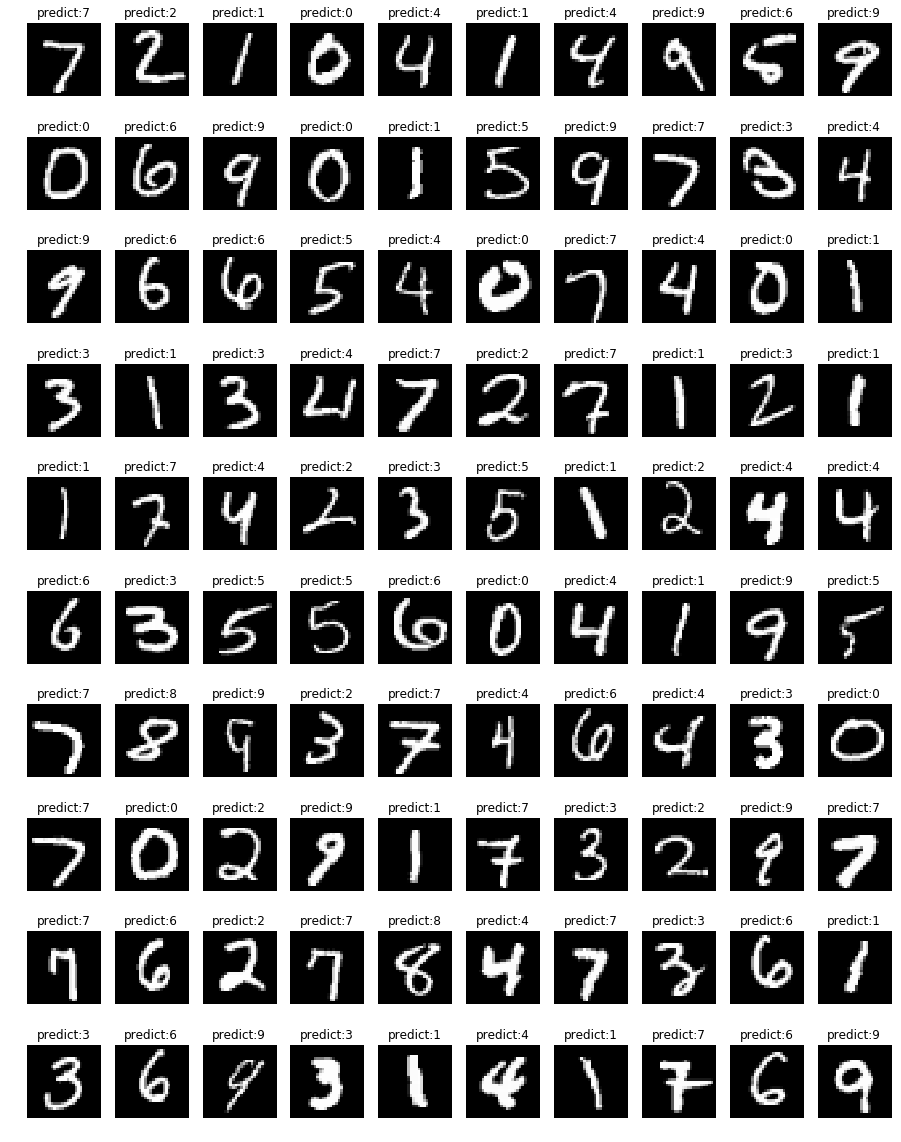

In [9]:
# 展示识别（分类）效果
show_image(test_image[:100],predict,10,10,'predict')